## IMPORT NECESSARY LIBRARIES & COLLECT DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# Collecting Data
mta = pd.read_csv(r'/Users/atalaybarut/Downloads/mta_data_2.csv')

In [3]:
mta.drop(['Unnamed: 0'], axis=1, inplace=True)

##  DATA EXPLORATION, CLEANING & PREPARATION

In [4]:
mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,03:00:00,REGULAR,7689903,2671580
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,07:00:00,REGULAR,7689908,2671583
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,11:00:00,REGULAR,7689924,2671637
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,15:00:00,REGULAR,7689970,2671692


In [5]:
mta.shape

(23610728, 11)

In [6]:
# Check if there are any duplicates in the complete dataset
mta.duplicated(keep='first').sum()

0

In [7]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23610728 entries, 0 to 23610727
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                        

In [8]:
# Eliminate spaces in the columns
print(mta.columns)
mta.columns = mta.columns.str.strip()
print(mta.columns)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


In [9]:
# Check if there are any null values in the Dataset
mta.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [10]:
# Concat DATE and TIME fields then change format to datetime
# Create DAY column to calculate daily turnstile traffic
mta['DATETIME'] = pd.to_datetime((mta['DATE']+" "+mta['TIME']),format="%m/%d/%Y %H:%M:%S")
mta['DATE'] = pd.to_datetime(mta['DATE'], format="%m/%d/%Y")
mta['DAY'] = mta['DATE'].dt.day_name()

In [11]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23610728 entries, 0 to 23610727
Data columns (total 13 columns):
 #   Column    Dtype         
---  ------    -----         
 0   C/A       object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      datetime64[ns]
 7   TIME      object        
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
 12  DAY       object        
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 2.3+ GB


In [12]:
mta['STATION'].nunique()

379

In [13]:
mta['STATION'].value_counts().sort_values(ascending=False).head(10)

34 ST-PENN STA     479502
FULTON ST          456380
GRD CNTRL-42 ST    406247
23 ST              346352
86 ST              306550
CANAL ST           274988
CHAMBERS ST        261244
34 ST-HERALD SQ    255549
59 ST              253655
42 ST-PORT AUTH    242003
Name: STATION, dtype: int64

In [14]:
mta_unique = mta.groupby(['UNIT','SCP'])[['STATION','DATETIME','ENTRIES','EXITS']].nunique()
print("*** Yapılan gruplamaya göre Unique olmayan istasyon sayısı:", mta_unique[mta_unique.STATION != 1]['STATION'].sum())
print("*** Dolayısıyla UNIT ve SCP alanlarının birleşimi bize unique olarak turnike bilgisini vermektedir")
print("\n",mta_unique)

*** Yapılan gruplamaya göre Unique olmayan istasyon sayısı: 0
*** Dolayısıyla UNIT ve SCP alanlarının birleşimi bize unique olarak turnike bilgisini vermektedir

                STATION  DATETIME  ENTRIES  EXITS
UNIT SCP                                        
R001 00-00-00        1      4808     4669   4714
     00-00-01        1      4808     4603   4685
     00-00-02        1      4808     4338   4672
     00-00-03        1      4810     4363   4463
     00-00-04        1      4808     4305   4628
...                ...       ...      ...    ...
R572 01-03-00        1      4762     4046   4684
     01-03-01        1      4763     4222   4634
     01-03-02        1      4764     4078   4652
     01-03-03        1      4760     4175   4640
     01-03-04        1      4762     4537   4713

[5170 rows x 4 columns]


In [15]:
# Function to get the unique DAY + DATE combination
#def get_day_date(x):
#    return f"{x.date()}_{x.day_name()}"

In [16]:
#mta['DAY_DATE'] = mta['DATETIME'].apply(get_day_date)

In [17]:
# DATA UNDERSTANDING FOR TRAFFIC CALCULATION
mta_grouped = mta.groupby(['STATION','UNIT','SCP','DATE','DAY'])['ENTRIES','EXITS'].agg(['max','min'])
mta_grouped.sort_values(('ENTRIES','max'),ascending=False).reset_index()

/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24718/1146770444.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_grouped = mta.groupby(['STATION','UNIT','SCP','DATE','DAY'])['ENTRIES','EXITS'].agg(['max','min'])


STATION  UNIT       SCP       DATE       DAY     ENTRIES  \
                                                                    max   
0             HEWES ST  R352  00-00-00 2021-04-16    Friday  2147432317   
1             HEWES ST  R352  00-00-00 2021-04-17  Saturday  2147432311   
2             HEWES ST  R352  00-00-00 2021-04-18    Sunday  2147432043   
3             HEWES ST  R352  00-00-00 2021-04-19    Monday  2147431846   
4             HEWES ST  R352  00-00-00 2021-04-20   Tuesday  2147431481   
...                ...   ...       ...        ...       ...         ...   
3931001  ROCKAWAY BLVD  R385  01-05-01 2020-07-16  Thursday           0   
3931002  ROCKAWAY BLVD  R385  01-05-01 2020-07-17    Friday           0   
3931003  ROCKAWAY BLVD  R385  01-05-01 2020-07-18  Saturday           0   
3931004  ROCKAWAY BLVD  R385  01-05-01 2020-07-19    Sunday           0   
3931005         111 ST  R355  01-04-01 2021-05-13  Thursday           0   

                         EXITS             
                min        max        min  
0           8421831  671146416    2645622  
1        2147432065  671146527  671146430  
2        2147431863  671146644  671146546  
3        2147431504  671146827  671146653  
4        2147431103  671147039  671146840  
...             ...        ...        ...  
3931001           0        101        101  
3931002           0        101        101  
3931003           0        101        101  
3931004           0        101        101  
3931005           0        386        386  

[3931006 rows x 9 columns]

In [18]:
# Group the sorted data and calculate ENTRIES & EXISTS for each element to create a summary dataframe
mta_entries = mta.groupby(['STATION','UNIT','SCP','DATE','DAY']).ENTRIES.max() - mta.groupby(['STATION','UNIT','SCP','DATE','DAY']).ENTRIES.min()
mta_entries = mta_entries.reset_index()

mta_exits = mta.groupby(['STATION','UNIT','SCP','DATE','DAY']).EXITS.max() - mta.groupby(['STATION','UNIT','SCP','DATE','DAY']).EXITS.min()
mta_exits = mta_exits.reset_index()

mta_entry_exit = pd.merge(left=mta_entries,right=mta_exits,on=['STATION','UNIT','SCP','DATE','DAY'])
mta_entry_exit.isnull().sum()

mta_entry_exit.columns = ['STATION','UNIT','SCP','DATE','DAY','ENTRIES_DIFF','EXITS_DIFF']
mta_entry_exit

,STATION,UNIT,SCP,DATE,DAY,ENTRIES_DIFF,EXITS_DIFF
0,1 AV,R248,00-00-00,2020-01-04,Saturday,1861,3406
1,1 AV,R248,00-00-00,2020-01-05,Sunday,1506,2728
2,1 AV,R248,00-00-00,2020-01-06,Monday,3478,3724
3,1 AV,R248,00-00-00,2020-01-07,Tuesday,3703,3788
4,1 AV,R248,00-00-00,2020-01-08,Wednesday,3895,3961
...,...,...,...,...,...,...,...
3931001,ZEREGA AV,R326,00-05-01,2022-02-28,Monday,0,0
3931002,ZEREGA AV,R326,00-05-01,2022-03-01,Tuesday,0,0
3931003,ZEREGA AV,R326,00-05-01,2022-03-02,Wednesday,0,0
3931004,ZEREGA AV,R326,00-05-01,2022-03-03,Thursday,0,0


In [19]:
mta_entry_exit['TRAFFIC'] = mta_entry_exit['ENTRIES_DIFF'] + mta_entry_exit['EXITS_DIFF']

In [20]:
mta_entry_exit['YEAR'] = mta_entry_exit['DATE'].dt.year.astype(object)

In [21]:
mta_entry_exit.sort_values('TRAFFIC',ascending=False).head(20)

,STATION,UNIT,SCP,DATE,DAY,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC,YEAR
109268,125 ST,R132,00-03-01,2022-01-21,Friday,2022148801,1788166358,3810315159,2022
128510,135 ST,R207,01-00-02,2020-12-29,Tuesday,1821543301,1717955558,3539498859,2020
3702493,TIMES SQ-42 ST,R033,01-00-01,2021-09-02,Thursday,1889996990,1428559627,3318556617,2021
631829,34 ST-HERALD SQ,R022,00-05-04,2020-01-07,Tuesday,1254422209,2048959868,3303382077,2020
631038,34 ST-HERALD SQ,R022,00-05-03,2020-01-07,Tuesday,1225866345,2036332110,3262198455,2020
274381,161/YANKEE STAD,R195,00-00-00,2020-06-22,Monday,1627398252,1627443437,3254841689,2020
274355,161/YANKEE STAD,R195,00-00-00,2020-05-27,Wednesday,1621027042,1621075359,3242102401,2020
274662,161/YANKEE STAD,R195,00-00-00,2021-03-30,Tuesday,1604323722,1570883510,3175207232,2021
114435,125 ST,R132,00-06-02,2021-04-14,Wednesday,1036126840,2005379204,3041506044,2021
1056311,57 ST-7 AV,R080,01-03-02,2020-04-19,Sunday,1562921352,1293862759,2856784111,2020


In [22]:
mta_entry_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3931006 entries, 0 to 3931005
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   STATION       object        
 1   UNIT          object        
 2   SCP           object        
 3   DATE          datetime64[ns]
 4   DAY           object        
 5   ENTRIES_DIFF  int64         
 6   EXITS_DIFF    int64         
 7   TRAFFIC       int64         
 8   YEAR          object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 299.9+ MB


## DETECTING & TREATING OUTLIERS

In [23]:
#mta_entry_exit['TRAFFIC'].describe()

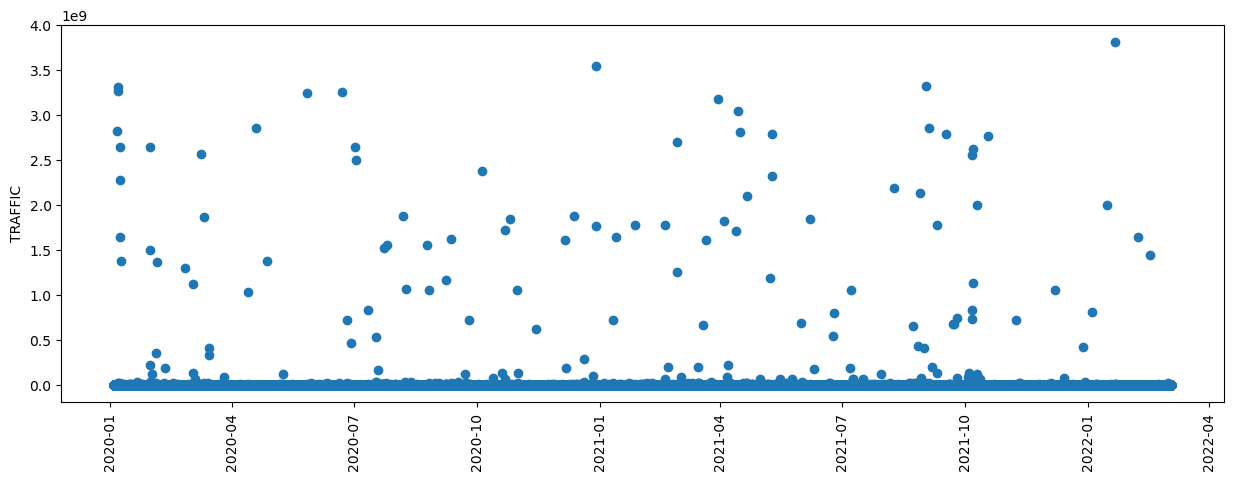

In [24]:
#sns.set(rc={"figure.figsize":(16, 8)})
# plt.figure(figsize=(8,4),dpi=150)
# ax = sns.scatterplot(x='DAY_DATE',y='TRAFFIC',data=mta_entry_exit, s=50)
# plt.xlabel("DAY",fontsize=10,fontweight="bold")
# plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
# plt.show()
plt.figure(figsize=[15,5], dpi=100)
plt.scatter(mta_entry_exit['DATE'],mta_entry_exit['TRAFFIC'])
plt.ylabel("TRAFFIC")
plt.xticks(rotation = 90)
plt.show()

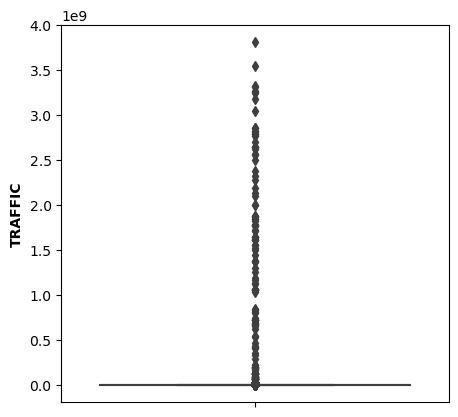

In [25]:
plt.figure(figsize=[5,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["TRAFFIC"])
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [26]:
def extract_whiskers(data):
    median_value = np.median(data) #Median
    upper_quartile = np.percentile(data, 75) #75% percent
    lower_quartile = np.percentile(data, 25) #25% percent

    iqr = upper_quartile - lower_quartile #Interquartile Range
    
    print("Upper Whisker:", data[data<=upper_quartile+1.5*iqr].max()) #Max Acceptable Value
    print("Lower Whisker:", data[data>=lower_quartile-1.5*iqr].min()) #Min Acceptable Value

In [27]:
extract_whiskers(mta_entry_exit['TRAFFIC'])

Upper Whisker: 2114
Lower Whisker: 0


In [28]:
mta_entry_exit['TRAFFIC'].median()

432.0

In [29]:
mta_entry_exit['TRAFFIC'][mta_entry_exit['TRAFFIC'] > 2134] = mta_entry_exit['TRAFFIC'].median()

/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24718/4117486442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_entry_exit['TRAFFIC'][mta_entry_exit['TRAFFIC'] > 2134] = mta_entry_exit['TRAFFIC'].median()


In [30]:
#mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['TRAFFIC'] > 2134].index, inplace=True)
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['TRAFFIC'] == 0].index, inplace=True)

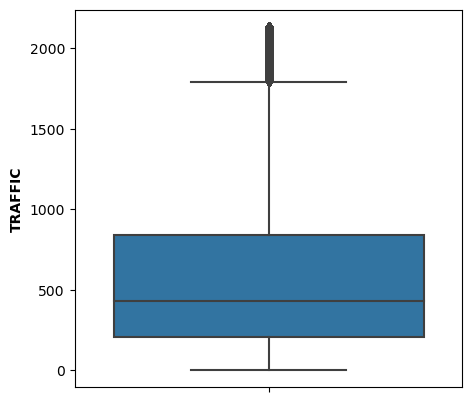

In [31]:
plt.figure(figsize=[5,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["TRAFFIC"])
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [32]:
mta_top_10 = mta_entry_exit.groupby(['STATION'])['ENTRIES_DIFF','EXITS_DIFF','TRAFFIC'].sum().sort_values('TRAFFIC', ascending=False).head(10)
mta_top_10 = mta_top_10.reset_index()
print(mta_top_10)

           STATION  ENTRIES_DIFF  EXITS_DIFF   TRAFFIC
0   34 ST-PENN STA    1918102027  2460376259  50600517
1            23 ST      67793043    59044234  33785587
2            86 ST     174531140    83089329  32551344
3        FULTON ST    5048222334  2277122568  31581072
4  34 ST-HERALD SQ    2736986445  4294665985  30385747
5  GRD CNTRL-42 ST     380619758  1586202337  30221796
6           125 ST    3479693072  4158709604  28410667
7            59 ST    1092458253   786681112  27908655
8   TIMES SQ-42 ST    2089314436  1506949716  26743802
9   14 ST-UNION SQ      63691608    50501763  25549997


/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24718/4219918376.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_top_10 = mta_entry_exit.groupby(['STATION'])['ENTRIES_DIFF','EXITS_DIFF','TRAFFIC'].sum().sort_values('TRAFFIC', ascending=False).head(10)


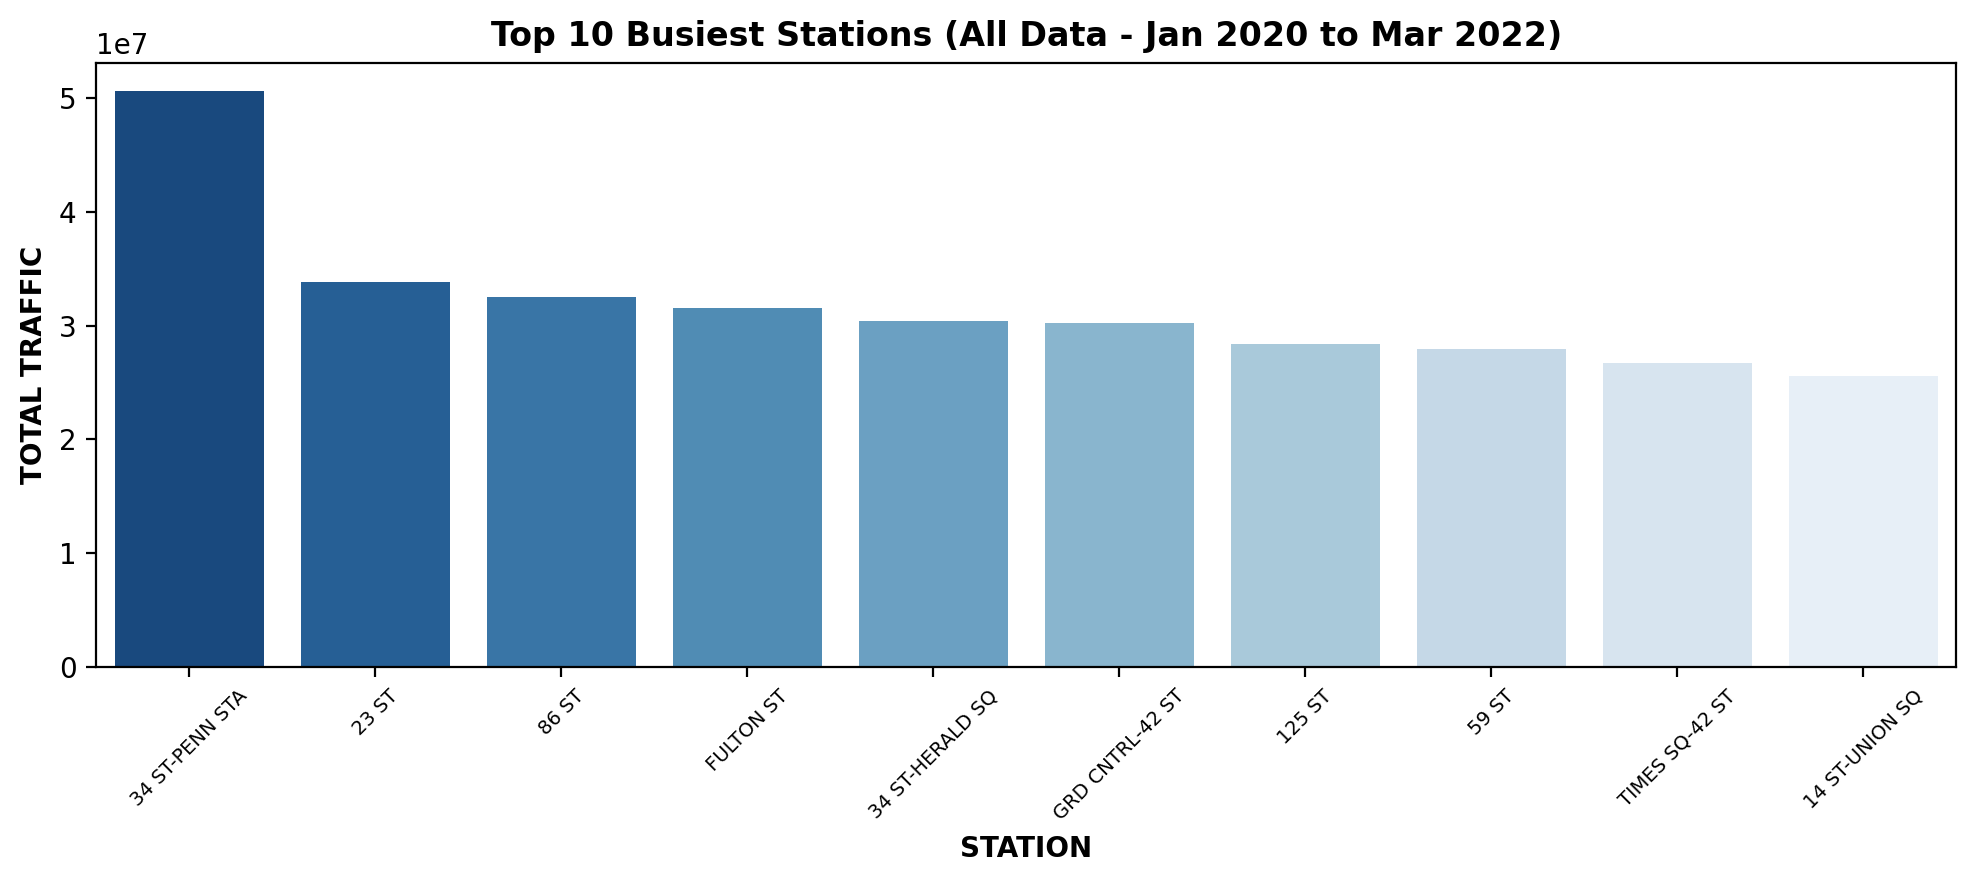

In [33]:
plt.figure(figsize=[12,4], dpi=200)
ax = sns.barplot(x = 'STATION',y = 'TRAFFIC',data = mta_top_10,palette=("Blues_r"))
plt.title('Top 10 Busiest Stations (All Data - Jan 2020 to Mar 2022)', weight="bold", fontsize=12)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel('STATION',fontsize=10,fontweight="bold")
plt.xticks(rotation=45, fontsize=7)
#ax.bar_label(ax.containers[0])
plt.show()

In [34]:
top_10_stations = [] 
for ind in mta_top_10.index:
    top_10_stations.append(mta_top_10['STATION'][ind])
print(top_10_stations)

['34 ST-PENN STA', '23 ST', '86 ST', 'FULTON ST', '34 ST-HERALD SQ', 'GRD CNTRL-42 ST', '125 ST', '59 ST', 'TIMES SQ-42 ST', '14 ST-UNION SQ']


In [35]:
mta_top_10_by_year = mta_entry_exit[(mta_entry_exit['STATION'].isin(top_10_stations)) & (mta_entry_exit['DATE'] < "2022-01-01")].groupby(['STATION','YEAR']).sum().sort_values('TRAFFIC', ascending=False)
mta_top_10_by_year = mta_top_10_by_year.reset_index() 
mta_top_10_by_year

,STATION,YEAR,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,34 ST-PENN STA,2021,1866083708,2408639826,27809048
1,23 ST,2021,54186108,45539213,18572411
2,34 ST-PENN STA,2020,49638510,48034540,17887752
3,FULTON ST,2021,3702734876,1702586756,16901635
4,86 ST,2021,32483135,16157554,16899516
5,GRD CNTRL-42 ST,2021,329787830,1529836147,16315451
6,34 ST-HERALD SQ,2021,69328077,26550016,16019296
7,TIMES SQ-42 ST,2021,1959227595,1488591095,15027713
8,59 ST,2021,1061966956,769202692,14864157
9,125 ST,2021,1045836321,2017572855,14392080


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '34 ST-PENN STA'),
  Text(1, 0, '23 ST'),
  Text(2, 0, 'FULTON ST'),
  Text(3, 0, '86 ST'),
  Text(4, 0, 'GRD CNTRL-42 ST'),
  Text(5, 0, '34 ST-HERALD SQ'),
  Text(6, 0, 'TIMES SQ-42 ST'),
  Text(7, 0, '59 ST'),
  Text(8, 0, '125 ST'),
  Text(9, 0, '14 ST-UNION SQ')])

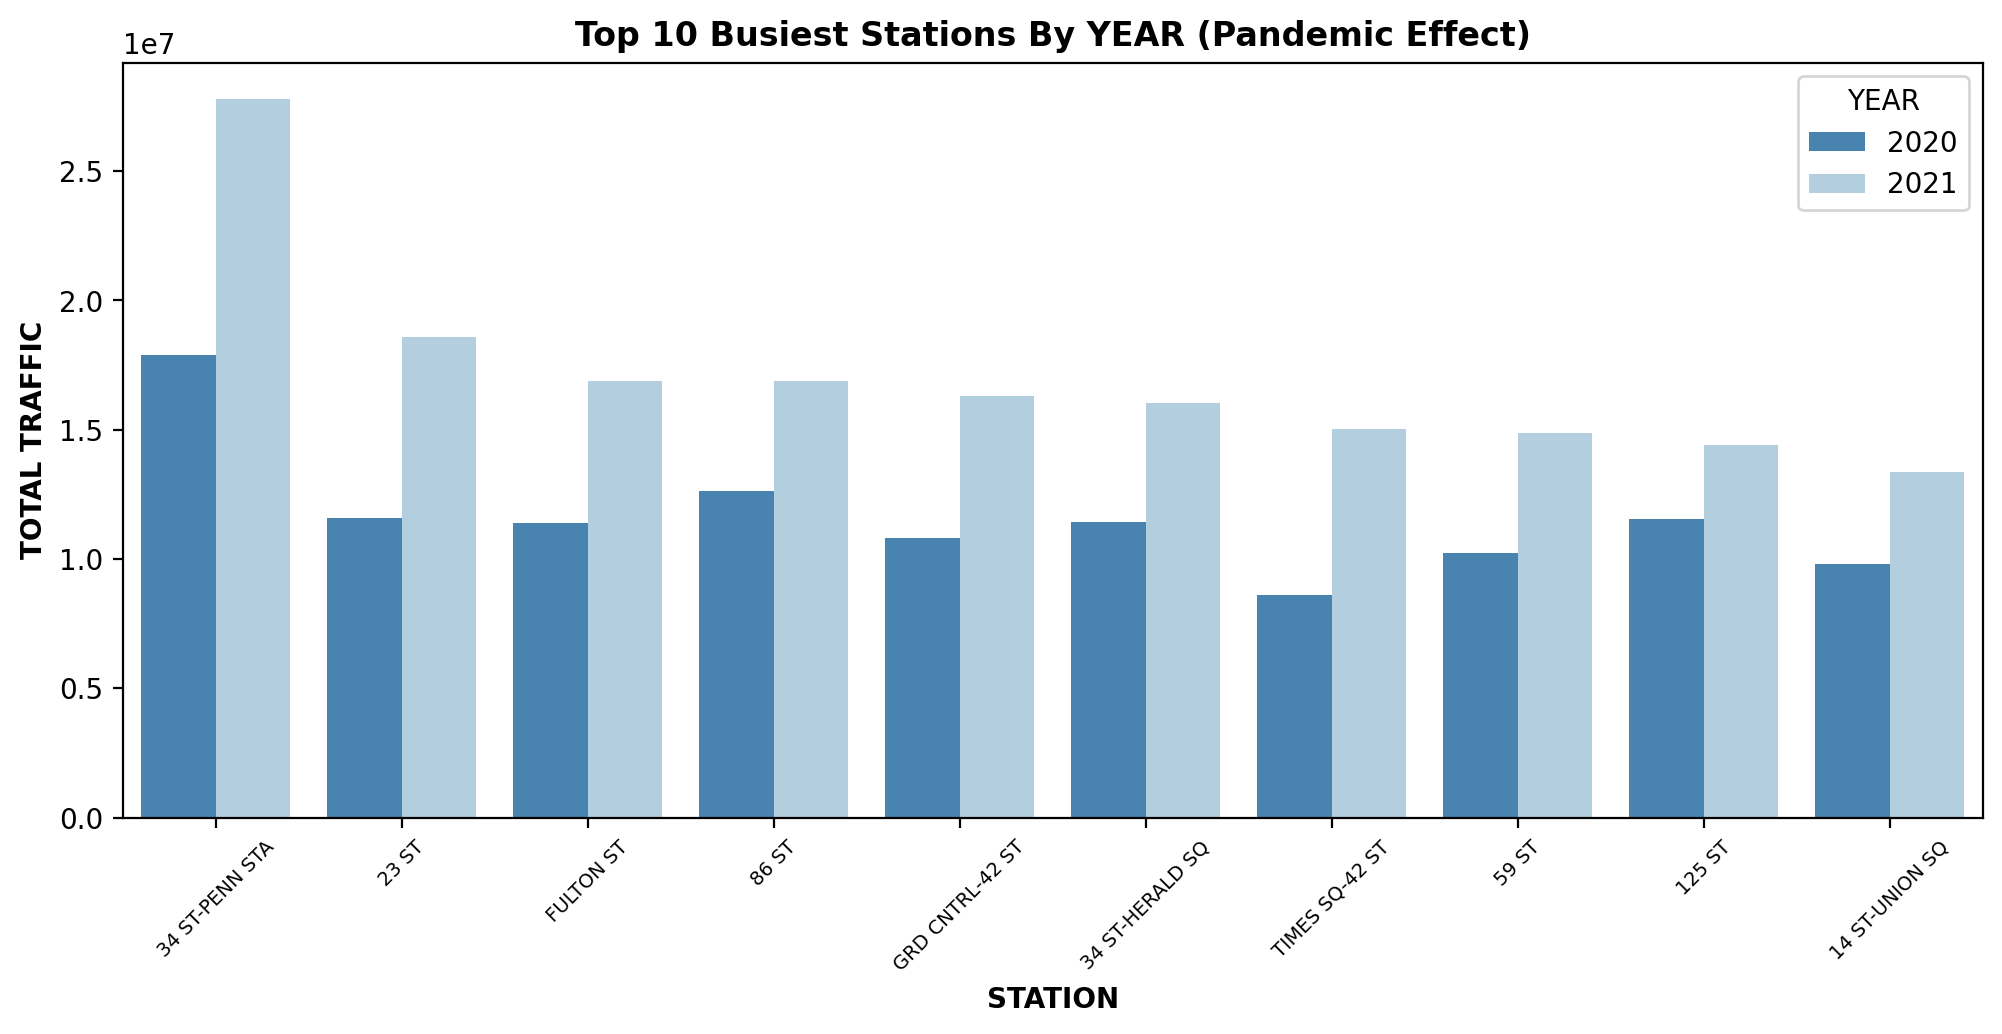

In [36]:
plt.figure(figsize=[12,5], dpi=200)
ax = sns.barplot(x = 'STATION',y = 'TRAFFIC',hue="YEAR",data = mta_top_10_by_year,palette=("Blues_r"))
plt.title('Top 10 Busiest Stations By YEAR (Pandemic Effect)', weight="bold", fontsize=12)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel('STATION',fontsize=10,fontweight="bold")
plt.xticks(rotation=45, fontsize=7)

In [37]:
#print(mta_entry_exit[(mta_entry_exit['DATE'] > "2021-05-31") & (mta_entry_exit['DATE'] < "2021-09-01")]['DATE'].max())
#print(mta_entry_exit[(mta_entry_exit['DATE'] > "2021-05-31") & (mta_entry_exit['DATE'] < "2021-09-01")]['DATE'].min())

In [38]:
mta_top_10_summer_2021 = mta_entry_exit[(mta_entry_exit['DATE'] > "2021-05-31") & (mta_entry_exit['DATE'] < "2021-09-01")].groupby(['STATION'])['ENTRIES_DIFF','EXITS_DIFF','TRAFFIC'].sum().sort_values('TRAFFIC', ascending=False).head(10)

mta_top_10_summer_2021 = mta_top_10_summer_2021.reset_index()

print(mta_top_10_summer_2021)

           STATION  ENTRIES_DIFF  EXITS_DIFF  TRAFFIC
0   34 ST-PENN STA     126141994     8809514  7563404
1            23 ST       2302810     2847461  4925881
2        FULTON ST       3237583     4726381  4567292
3            86 ST       2391105     3284659  4403928
4  GRD CNTRL-42 ST       2642474     3897588  4403923
5   TIMES SQ-42 ST       1845287     2679674  4173752
6  34 ST-HERALD SQ       3315966     4311768  4096194
7            59 ST       8001507    18341339  3832871
8           125 ST       2280320     2740994  3746746
9  42 ST-PORT AUTH       4043718     3519251  3694250


/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24718/2688762578.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_top_10_summer_2021 = mta_entry_exit[(mta_entry_exit['DATE'] > "2021-05-31") & (mta_entry_exit['DATE'] < "2021-09-01")].groupby(['STATION'])['ENTRIES_DIFF','EXITS_DIFF','TRAFFIC'].sum().sort_values('TRAFFIC', ascending=False).head(10)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '34 ST-PENN STA'),
  Text(1, 0, '23 ST'),
  Text(2, 0, 'FULTON ST'),
  Text(3, 0, '86 ST'),
  Text(4, 0, 'GRD CNTRL-42 ST'),
  Text(5, 0, 'TIMES SQ-42 ST'),
  Text(6, 0, '34 ST-HERALD SQ'),
  Text(7, 0, '59 ST'),
  Text(8, 0, '125 ST'),
  Text(9, 0, '42 ST-PORT AUTH')])

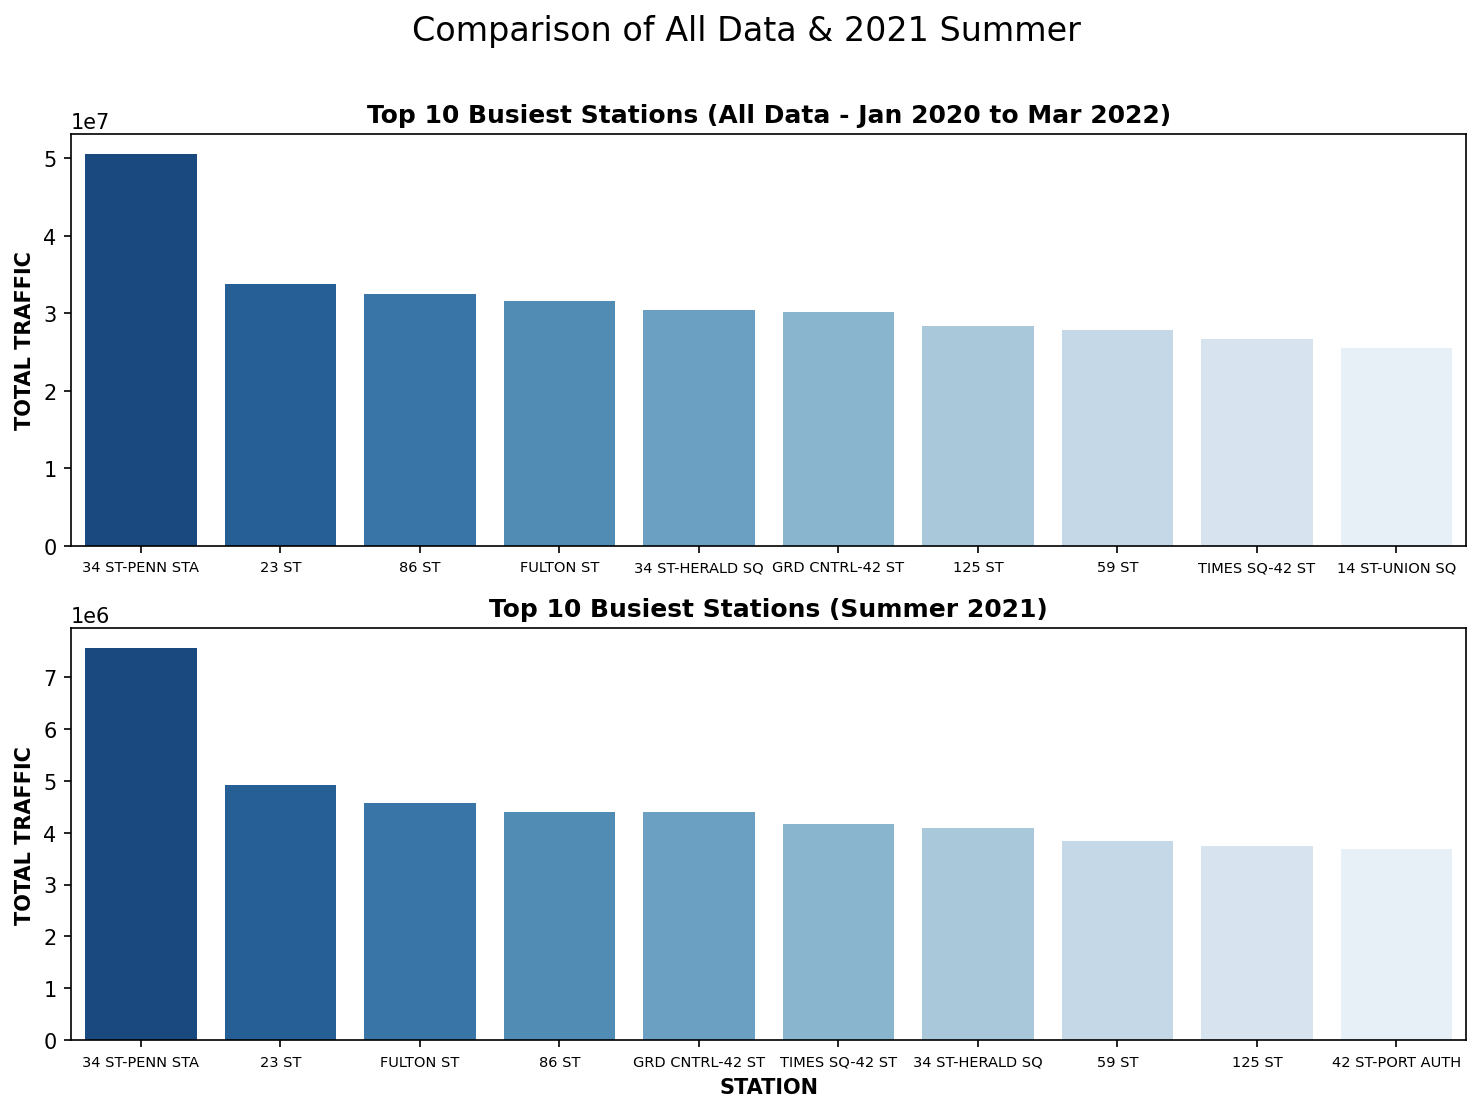

In [62]:
plt.figure(figsize=[12,8], dpi=150)

plt.suptitle('Comparison of All Data & 2021 Summer',fontsize = 16)

plt.subplot(2,1,1)
ax = sns.barplot(x = 'STATION',y = 'TRAFFIC',data = mta_top_10,palette=("Blues_r"))
plt.title('Top 10 Busiest Stations (All Data - Jan 2020 to Mar 2022)', weight="bold", fontsize=12)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel("")
plt.xticks(fontsize=7)

plt.subplot(2,1,2)
ax = sns.barplot(x = 'STATION',y = 'TRAFFIC',data = mta_top_10_summer_2021,palette=("Blues_r"))
plt.title('Top 10 Busiest Stations (Summer 2021)', weight="bold", fontsize=12)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel('STATION',fontsize=10,fontweight="bold")
plt.xticks(fontsize=7)


In [56]:
mta_top_days = mta_entry_exit.groupby(['DAY']).sum().sort_values(['TRAFFIC'], ascending=False)
mta_top_days = mta_top_days.reset_index()
mta_top_days

,DAY,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,Wednesday,17523349755,14547301585,337683945
1,Tuesday,12322763962,13406452446,334603054
2,Thursday,9003092820,7523764716,331055543
3,Friday,15773293919,12129618089,327979711
4,Monday,17270487995,16611612682,319164392
5,Saturday,6960533714,7140431306,239675759
6,Sunday,11825105062,9984082810,199230722


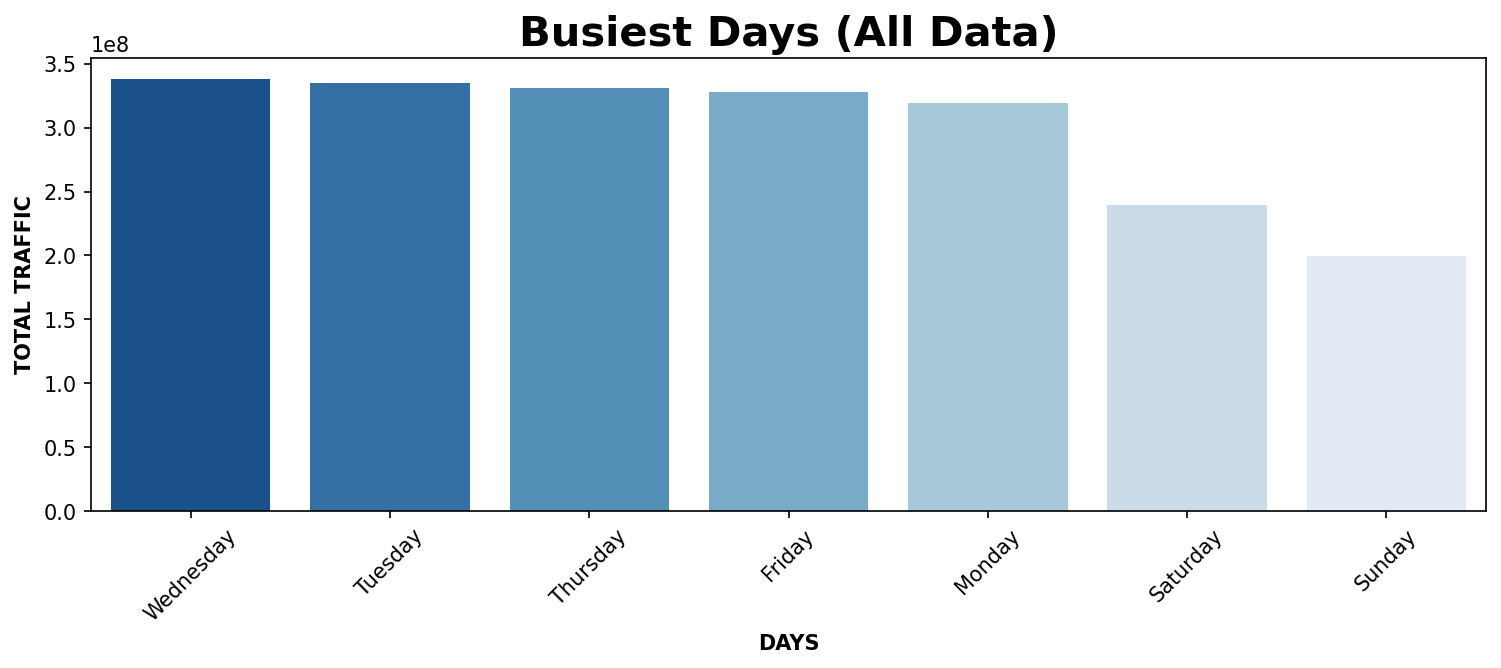

In [57]:
plt.figure(figsize=[12,4], dpi=150)
ax = sns.barplot(x = 'DAY',y = 'TRAFFIC',data = mta_top_days,palette=("Blues_r"))
plt.title('Busiest Days (All Data)', weight="bold", fontsize=20)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel('DAYS',fontsize=10,fontweight="bold")
plt.xticks(rotation=45)
#plt.axis(ymin=0, ymax=800);
plt.show()

In [58]:
mta_top_days_summer_2021 = mta_entry_exit[(mta_entry_exit['DATE'] > "2021-05-31") & (mta_entry_exit['DATE'] < "2021-09-01")].groupby(['DAY']).sum().sort_values(['TRAFFIC'], ascending=False)
mta_top_days_summer_2021 = mta_top_days_summer_2021.reset_index()
mta_top_days_summer_2021

,DAY,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,Tuesday,510455140,90205580,47803446
1,Wednesday,100407795,186814878,44785871
2,Thursday,471703068,1421185110,44656999
3,Friday,467902115,1124367190,43934379
4,Monday,2160951943,2622773029,41868178
5,Saturday,112421029,2164602425,32793373
6,Sunday,65745864,67773513,26610413


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

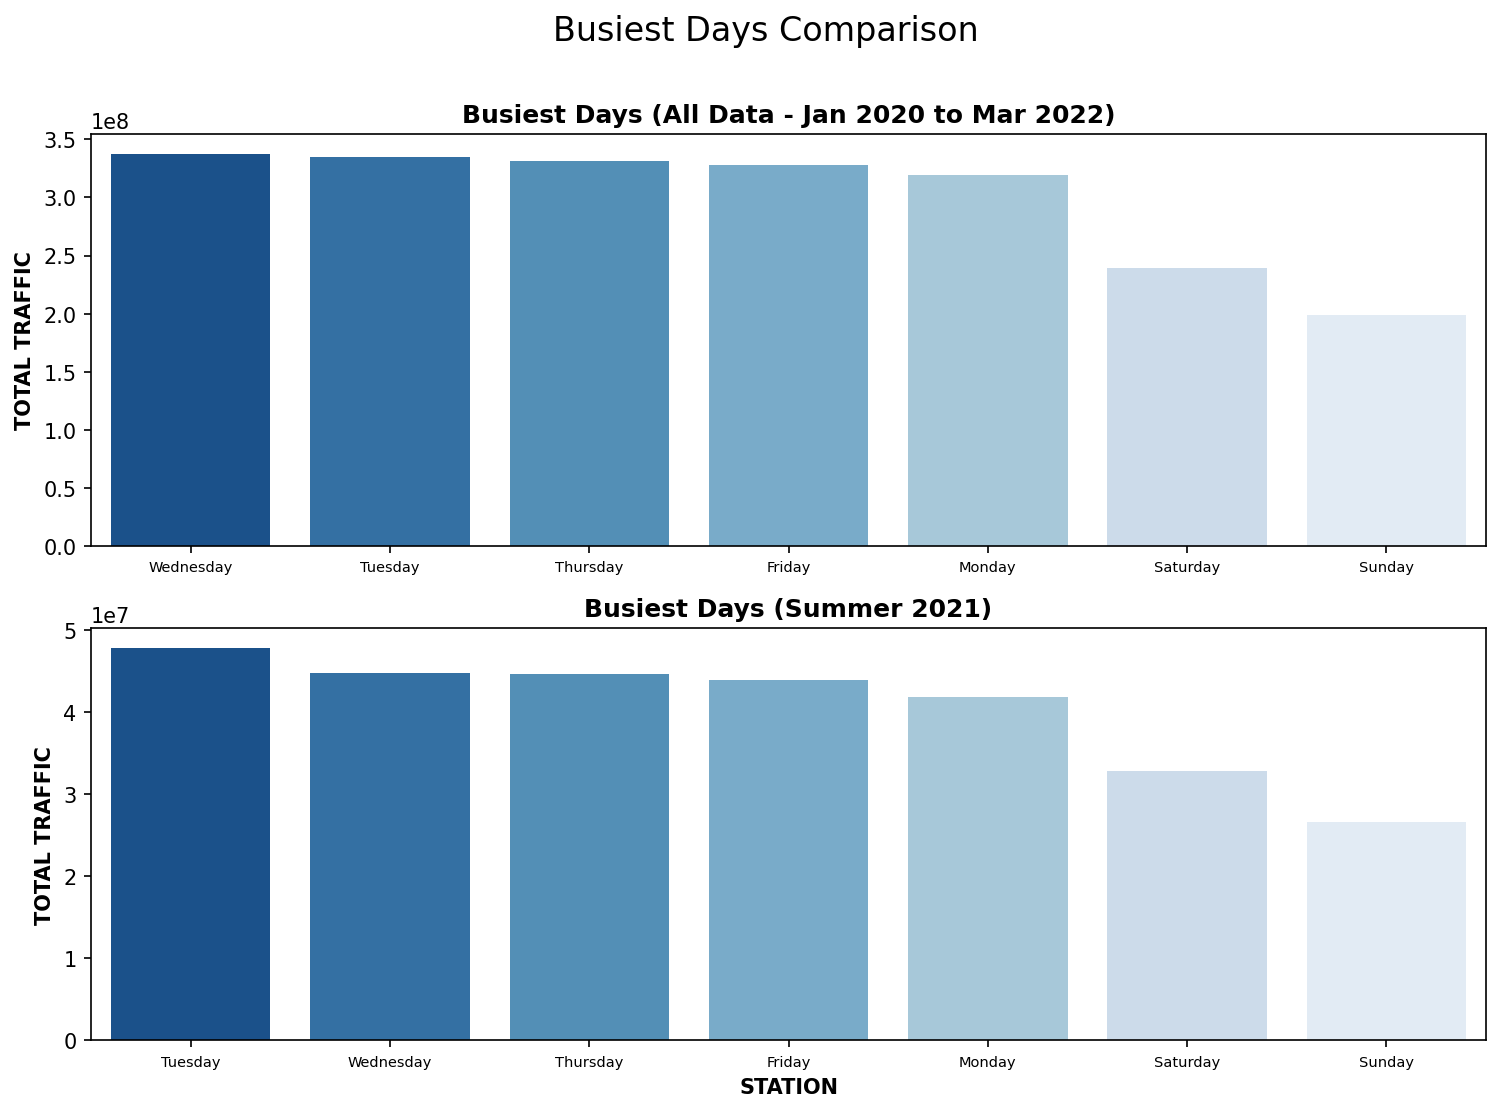

In [83]:
plt.figure(figsize=[12,8], dpi=150)

plt.suptitle('Busiest Days Comparison',fontsize = 16)

plt.subplot(2,1,1)
ax = sns.barplot(x = 'DAY',y = 'TRAFFIC',data = mta_top_days,palette=("Blues_r"))
plt.title('Busiest Days (All Data - Jan 2020 to Mar 2022)', weight="bold", fontsize=12)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel("")
plt.xticks(fontsize=7)

plt.subplot(2,1,2)
ax = sns.barplot(x = 'DAY',y = 'TRAFFIC',data = mta_top_days_summer_2021,palette=("Blues_r"))
plt.title('Busiest Days (Summer 2021)', weight="bold", fontsize=12)
plt.ylabel('TOTAL TRAFFIC',fontsize=10,fontweight="bold")
plt.xlabel('STATION',fontsize=10,fontweight="bold")
plt.xticks(fontsize=7)

In [84]:
mta_top_stations_by_day = mta_entry_exit[mta_entry_exit.STATION.isin(top_10_stations)]
mta_top_stations_by_day = mta_top_stations_by_day.groupby(['DAY','STATION']).sum().sort_values('TRAFFIC',ascending=False)
mta_top_stations_by_day = mta_top_stations_by_day.reset_index()

mta_top_stations_by_day

,DAY,STATION,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,Wednesday,34 ST-PENN STA,9671657,7066910,8004536
1,Tuesday,34 ST-PENN STA,14355438,15926831,7976484
2,Thursday,34 ST-PENN STA,36812070,56274102,7902664
3,Friday,34 ST-PENN STA,130137473,15701006,7866051
4,Monday,34 ST-PENN STA,54969059,71268154,7704340
...,...,...,...,...,...
65,Sunday,TIMES SQ-42 ST,10406772,5277364,2963863
66,Sunday,23 ST,1391181,1655203,2923357
67,Sunday,GRD CNTRL-42 ST,334575561,1535582473,2767569
68,Sunday,FULTON ST,15168003,17477526,2551697


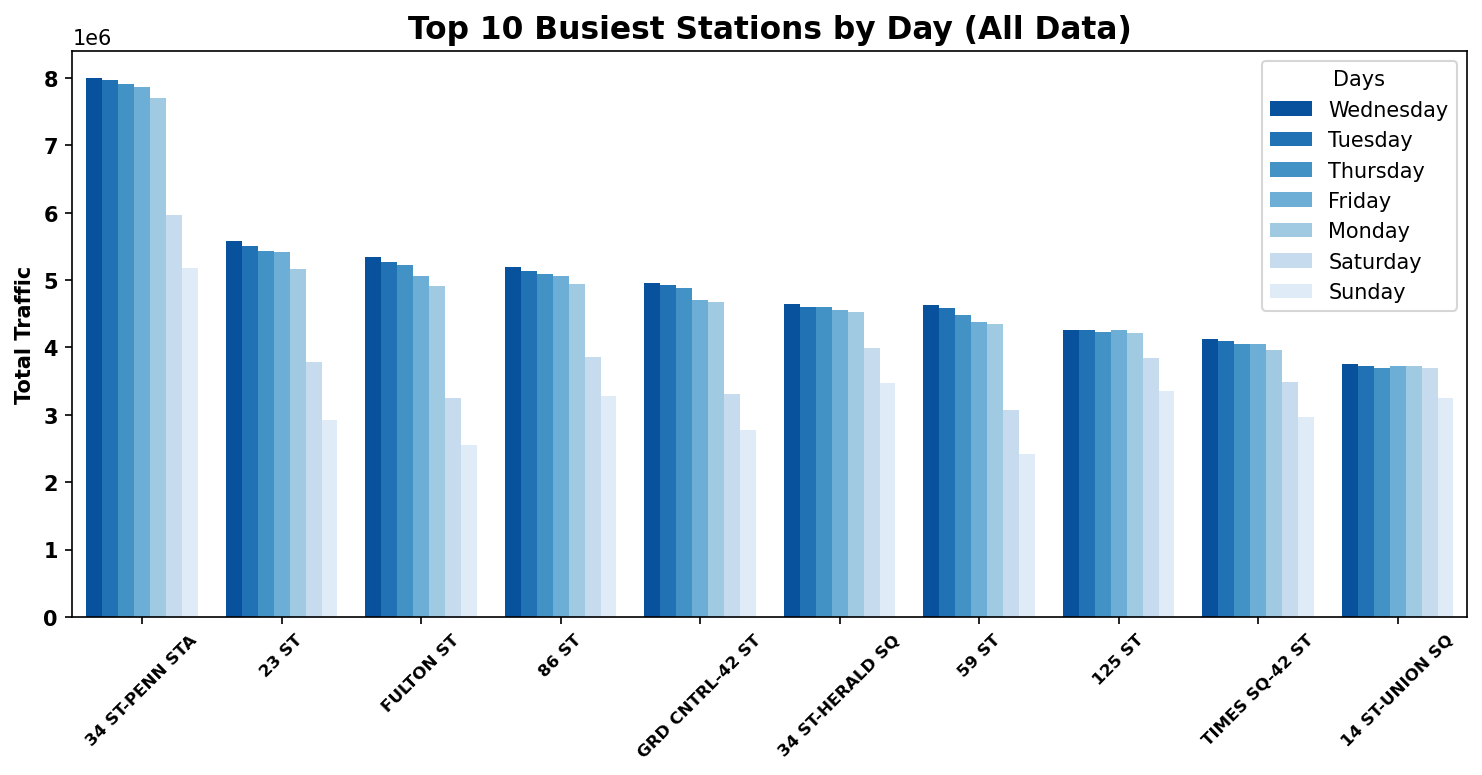

In [45]:
plt.figure(figsize=[12,5], dpi=150)
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="DAY",data=mta_top_stations_by_day, saturation=1,palette=("Blues_r"))
plt.title("Top 10 Busiest Stations by Day (All Data)", weight="bold", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=45, weight="bold",fontsize=8)
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.show()

In [46]:
top_10_stations_2021_summer = [] 
for ind in mta_top_10_summer_2021.index:
    top_10_stations_2021_summer.append(mta_top_10_summer_2021['STATION'][ind])
print(top_10_stations_2021_summer)

['34 ST-PENN STA', '23 ST', 'FULTON ST', '86 ST', 'GRD CNTRL-42 ST', 'TIMES SQ-42 ST', '34 ST-HERALD SQ', '59 ST', '125 ST', '42 ST-PORT AUTH']


In [47]:
mta_top_10_timeperiods = mta[(mta['DATE'] > "2021-05-31") & (mta['DATE'] < "2021-09-01") & (mta['STATION'].isin(top_10_stations_2021_summer))]
mta_top_10_timeperiods

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAY
5461976,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-28,00:00:00,REGULAR,7625998,2609113,2021-08-28 00:00:00,Saturday
5461977,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-28,04:00:00,REGULAR,7626014,2609117,2021-08-28 04:00:00,Saturday
5461978,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-28,08:00:00,REGULAR,7626024,2609135,2021-08-28 08:00:00,Saturday
5461979,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-28,12:00:00,REGULAR,7626086,2609191,2021-08-28 12:00:00,Saturday
5461980,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-28,16:00:00,REGULAR,7626206,2609221,2021-08-28 16:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359517,R305,R206,01-00-02,125 ST,23,IRT,2021-06-04,05:00:00,REGULAR,245804992,141330105,2021-06-04 05:00:00,Friday
8359518,R305,R206,01-00-02,125 ST,23,IRT,2021-06-04,09:00:00,REGULAR,245805079,141330208,2021-06-04 09:00:00,Friday
8359519,R305,R206,01-00-02,125 ST,23,IRT,2021-06-04,13:00:00,REGULAR,245805237,141330377,2021-06-04 13:00:00,Friday
8359520,R305,R206,01-00-02,125 ST,23,IRT,2021-06-04,17:00:00,REGULAR,245805508,141330643,2021-06-04 17:00:00,Friday


In [48]:
mta_top_10_timeperiods['HOUR'] = pd.to_datetime(mta_top_10_timeperiods['TIME'], format="%H:%M:%S").dt.hour

/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24718/2463021360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_top_10_timeperiods['HOUR'] = pd.to_datetime(mta_top_10_timeperiods['TIME'], format="%H:%M:%S").dt.hour


In [49]:
def get_time_period(time):
    if time >= 0 and time < 4:
        return "12am-4am"
    elif time >= 4 and time < 8:
        return "4am-8am"
    elif time >= 8 and time < 12:
        return "8am-12pm"
    elif time >= 12 and time < 16:
        return "12pm-4pm"    
    elif time >= 16 and time < 20:
        return "4pm-8pm"    
    else:
        return "8pm-12am"

In [50]:
mta_top_10_timeperiods['TIMEPERIOD'] = mta_top_10_timeperiods['HOUR'].apply(get_time_period)

/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24718/1938972611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_top_10_timeperiods['TIMEPERIOD'] = mta_top_10_timeperiods['HOUR'].apply(get_time_period)


In [68]:
mta_top_10_timeperiods.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAY,HOUR,TIMEPERIOD
5684595,A081,R028,04-05-00,FULTON ST,ACJZ2345,BMT,2021-08-24,03:00:00,REGULAR,2450,0,2021-08-24 03:00:00,Tuesday,3,12am-4am
7194462,N072,R012,05-00-02,34 ST-PENN STA,ACE,IND,2021-07-07,04:00:00,REGULAR,6154314,2221218,2021-07-07 04:00:00,Wednesday,4,4am-8am
7193992,N070,R012,04-00-04,34 ST-PENN STA,ACE,IND,2021-07-05,20:00:00,REGULAR,474172,349472,2021-07-05 20:00:00,Monday,20,8pm-12am
7501348,R206,R014,02-00-02,FULTON ST,2345ACJZ,IRT,2021-06-28,21:00:00,REGULAR,1617257,4167589,2021-06-28 21:00:00,Monday,21,8pm-12am
7867885,N507,R023,00-03-06,34 ST-HERALD SQ,BDFMNQRW,IND,2021-06-12,16:00:00,REGULAR,1309497,75527,2021-06-12 16:00:00,Saturday,16,4pm-8pm


In [78]:
mta_entries_timeperiods = mta_top_10_timeperiods.groupby(['STATION','UNIT','SCP','DATE','DAY','TIMEPERIOD']).ENTRIES.max() - mta_top_10_timeperiods.groupby(['STATION','UNIT','SCP','DATE','DAY','TIMEPERIOD']).ENTRIES.min()
mta_entries_timeperiods = mta_entries_timeperiods.reset_index()

mta_exits_timeperiods = mta_top_10_timeperiods.groupby(['STATION','UNIT','SCP','DATE','DAY','TIMEPERIOD']).EXITS.max() - mta_top_10_timeperiods.groupby(['STATION','UNIT','SCP','DATE','DAY','TIMEPERIOD']).EXITS.min()
mta_exits_timeperiods = mta_exits_timeperiods.reset_index()

mta_entry_exit_timeperiods = pd.merge(left=mta_entries_timeperiods,right=mta_exits_timeperiods,on=['STATION','UNIT','SCP','DATE','DAY','TIMEPERIOD'])

mta_entry_exit_timeperiods.columns = ['STATION','UNIT','SCP','DATE','DAY','TIMEPERIOD','ENTRIES_DIFF','EXITS_DIFF']

In [79]:
mta_entry_exit_timeperiods['TRAFFIC'] = mta_entry_exit_timeperiods['ENTRIES_DIFF'] + mta_entry_exit_timeperiods['EXITS_DIFF']

In [80]:
mta_entry_exit_timeperiods.sort_values(['TRAFFIC'], ascending=False)

,STATION,UNIT,SCP,DATE,DAY,TIMEPERIOD,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
318148,GRD CNTRL-42 ST,R046,00-06-00,2021-07-29,Thursday,8am-12pm,428,766,1194
319250,GRD CNTRL-42 ST,R046,00-06-02,2021-07-29,Thursday,8am-12pm,566,555,1121
318699,GRD CNTRL-42 ST,R046,00-06-01,2021-07-29,Thursday,8am-12pm,548,436,984
160365,42 ST-PORT AUTH,R011,00-00-00,2021-08-30,Monday,4am-8am,254,648,902
3223,125 ST,R102,00-00-00,2021-08-17,Tuesday,12pm-4pm,328,469,797
...,...,...,...,...,...,...,...,...,...
123048,34 ST-PENN STA,R013,02-00-06,2021-07-19,Monday,12pm-4pm,0,0,0
123047,34 ST-PENN STA,R013,02-00-06,2021-07-19,Monday,12am-4am,0,0,0
123046,34 ST-PENN STA,R013,02-00-06,2021-07-18,Sunday,8pm-12am,0,0,0
123045,34 ST-PENN STA,R013,02-00-06,2021-07-18,Sunday,8am-12pm,0,0,0


In [75]:
print(mta_entry_exit_timeperiods['DATE'].min())
print(mta_entry_exit_timeperiods['DATE'].max())
print(mta_entry_exit_timeperiods[mta_entry_exit_timeperiods['STATION'].isin(top_10_stations_2021_summer) == False])

2021-06-01 00:00:00
2021-08-31 00:00:00
Empty DataFrame
Columns: [STATION, UNIT, SCP, DATE, DAY, TIMEPERIOD, ENTRIES_DIFF, EXITS_DIFF, TRAFFIC]
Index: []


In [55]:
mta_entry_exit_timeperiods.groupby(['DAY']).sum()

,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
DAY,,,
Friday,7670,7416,15086
Monday,4344,3372,7716
Saturday,3471,3019,6490
Sunday,1241,1232,2473
Thursday,11401,21545,32946
Tuesday,7185,6909,14094
Wednesday,2118,2752,4870
